# 6.3 Geographic Visualization


### This script contains the following:
#### 1. Import data and libraries
#### 2. Data wrangling
#### 3. Data cleaning
#### 4. Plotting a choropleth

## 1. Import data and libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import os
import folium
import json

In [2]:
# This command propts matplotlib visuals to appear in the notebook

%matplotlib inline

In [11]:
# Import ".json" file for the U.S.

country_geo = r'/Users/sanyamohsini/Desktop/CareerFoundry_Data Analytics/Achievement 6/02 Data/Original data/us-states.json'

In [12]:
country_geo

'/Users/sanyamohsini/Desktop/CareerFoundry_Data Analytics/Achievement 6/02 Data/Original data/us-states.json'

In [15]:
# Looking at JSON file contents here

f = open(country_geo)

#returns JSON object as a dictionary
data = json.load(f)

#Iterating through the json list
for i in data['features']:
    print(i)

{'type': 'Feature', 'id': 'AL', 'properties': {'name': 'Alabama'}, 'geometry': {'type': 'Polygon', 'coordinates': [[[-87.359296, 35.00118], [-85.606675, 34.984749], [-85.431413, 34.124869], [-85.184951, 32.859696], [-85.069935, 32.580372], [-84.960397, 32.421541], [-85.004212, 32.322956], [-84.889196, 32.262709], [-85.058981, 32.13674], [-85.053504, 32.01077], [-85.141136, 31.840985], [-85.042551, 31.539753], [-85.113751, 31.27686], [-85.004212, 31.003013], [-85.497137, 30.997536], [-87.600282, 30.997536], [-87.633143, 30.86609], [-87.408589, 30.674397], [-87.446927, 30.510088], [-87.37025, 30.427934], [-87.518128, 30.280057], [-87.655051, 30.247195], [-87.90699, 30.411504], [-87.934375, 30.657966], [-88.011052, 30.685351], [-88.10416, 30.499135], [-88.137022, 30.318396], [-88.394438, 30.367688], [-88.471115, 31.895754], [-88.241084, 33.796253], [-88.098683, 34.891641], [-88.202745, 34.995703], [-87.359296, 35.00118]]]}}
{'type': 'Feature', 'id': 'AK', 'properties': {'name': 'Alaska'},

In [16]:
# Folder Path

path = r'/Users/sanyamohsini/Desktop/CareerFoundry_Data Analytics/Achievement 6'

In [17]:
path

'/Users/sanyamohsini/Desktop/CareerFoundry_Data Analytics/Achievement 6'

In [22]:
# Import us_births.csv

us_births = pd.read_csv(os.path.join(path, '02 Data', 'Prepared data', 'us_births_cleaned_2.csv'), index_col = False)

In [23]:
us_births.head()

,Unnamed: 0,State,State_abbrev,Year,Gender_baby,Education_level,Education_code,Births,Avg_age_mother,Avg_birth_weight(g)
0,0,Alabama,AL,2016,F,8th grade or less,1,1052,27.8,3116.9
1,1,Alabama,AL,2016,F,9th through 12th grade with no diploma,2,3436,24.1,3040.0
2,2,Alabama,AL,2016,F,High school graduate or GED completed,3,8777,25.4,3080.0
3,3,Alabama,AL,2016,F,"Some college credit, but not a degree",4,6453,26.7,3121.9
4,4,Alabama,AL,2016,F,"Associate degree (AA, AS)",5,2227,28.9,3174.3


In [24]:
# Drop unnamed column

us_births = us_births.drop(columns = ['Unnamed: 0'])

In [25]:
us_births.head()

,State,State_abbrev,Year,Gender_baby,Education_level,Education_code,Births,Avg_age_mother,Avg_birth_weight(g)
0,Alabama,AL,2016,F,8th grade or less,1,1052,27.8,3116.9
1,Alabama,AL,2016,F,9th through 12th grade with no diploma,2,3436,24.1,3040.0
2,Alabama,AL,2016,F,High school graduate or GED completed,3,8777,25.4,3080.0
3,Alabama,AL,2016,F,"Some college credit, but not a degree",4,6453,26.7,3121.9
4,Alabama,AL,2016,F,"Associate degree (AA, AS)",5,2227,28.9,3174.3


In [26]:
us_births.shape

(5496, 9)

## 2. Data wrangling

In [27]:
us_births.columns

Index(['State', 'State_abbrev', 'Year', 'Gender_baby', 'Education_level',
       'Education_code', 'Births', 'Avg_age_mother', 'Avg_birth_weight(g)'],
      dtype='object')

In [37]:
# select only the necessary columns and put them in a list called columns
columns = ["State", "Year", "Gender_baby", "Education_level", "Births", "Avg_age_mother", "Avg_birth_weight(g)"]

In [38]:
columns

['State',
 'Year',
 'Gender_baby',
 'Education_level',
 'Births',
 'Avg_age_mother',
 'Avg_birth_weight(g)']

In [39]:
# Create a subset

us_births_country = us_births[columns]

In [40]:
us_births_country.head()

,State,Year,Gender_baby,Education_level,Births,Avg_age_mother,Avg_birth_weight(g)
0,Alabama,2016,F,8th grade or less,1052,27.8,3116.9
1,Alabama,2016,F,9th through 12th grade with no diploma,3436,24.1,3040.0
2,Alabama,2016,F,High school graduate or GED completed,8777,25.4,3080.0
3,Alabama,2016,F,"Some college credit, but not a degree",6453,26.7,3121.9
4,Alabama,2016,F,"Associate degree (AA, AS)",2227,28.9,3174.3


## 3. Data cleaning

In [42]:
#Check for missing values
us_births_country.isnull().sum()

State                  0
Year                   0
Gender_baby            0
Education_level        0
Births                 0
Avg_age_mother         0
Avg_birth_weight(g)    0
dtype: int64

#### No missing values

In [43]:
# Check for duplicates
dups = us_births_country.duplicated()

In [44]:
dups.shape

(5496,)

#### No duplicates

<Axes: xlabel='Births', ylabel='Count'>

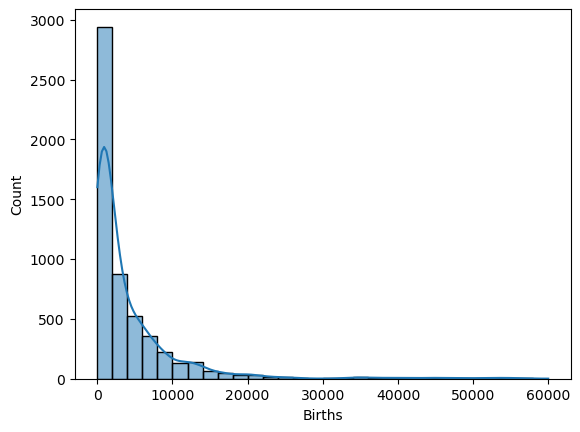

In [73]:
# Check for extreme values
sns.histplot(us_births_country['Births'], bins=30, kde = True)

In [74]:
#Check how many extreme values
us_births_country[us_births_country['Births'] >10000]

,State,Year,Gender_baby,Education_level,Births,Avg_age_mother,Avg_birth_weight(g)
218,Arizona,2016,F,High school graduate or GED completed,10386,26.2,3218.4
227,Arizona,2016,M,High school graduate or GED completed,10905,26.2,3303.6
228,Arizona,2016,M,"Some college credit, but not a degree",10214,27.6,3349.6
236,Arizona,2017,F,High school graduate or GED completed,10473,26.4,3204.5
245,Arizona,2017,M,High school graduate or GED completed,11019,26.3,3311.8
...,...,...,...,...,...,...,...
5048,Virginia,2021,F,High school graduate or GED completed,11750,26.8,3143.6
5051,Virginia,2021,F,"Bachelor's degree (BA, AB, BS)",11252,31.8,3278.1
5057,Virginia,2021,M,High school graduate or GED completed,12369,27.0,3252.4
5060,Virginia,2021,M,"Bachelor's degree (BA, AB, BS)",12072,31.9,3395.8


In [75]:
#Check how many extreme values
us_births_country[us_births_country['Births'] >20000]

,State,Year,Gender_baby,Education_level,Births,Avg_age_mother,Avg_birth_weight(g)
433,California,2016,F,9th through 12th grade with no diploma,23614,26.6,3214.7
434,California,2016,F,High school graduate or GED completed,57435,27.1,3235.8
435,California,2016,F,"Some college credit, but not a degree",47094,28.4,3239.1
437,California,2016,F,"Bachelor's degree (BA, AB, BS)",45550,32.3,3253.0
438,California,2016,F,"Master's degree (MA, MS, MEng, MEd, MSW, MBA)",20235,33.4,3240.1
...,...,...,...,...,...,...,...
4725,Texas,2021,F,"Some college credit, but not a degree",36770,28.1,3165.2
4727,Texas,2021,F,"Bachelor's degree (BA, AB, BS)",36122,31.3,3231.5
4733,Texas,2021,M,High school graduate or GED completed,55462,26.3,3239.4
4734,Texas,2021,M,"Some college credit, but not a degree",38140,28.2,3279.2


In [81]:
#Check how many extreme values
us_births_country[us_births_country['Births'] > 50000]

,State,Year,Gender_baby,Education_level,Births,Avg_age_mother,Avg_birth_weight(g)
434,California,2016,F,High school graduate or GED completed,57435,27.1,3235.8
443,California,2016,M,High school graduate or GED completed,59967,27.1,3335.3
452,California,2017,F,High school graduate or GED completed,55492,27.2,3229.8
461,California,2017,M,High school graduate or GED completed,57487,27.2,3329.7
470,California,2018,F,High school graduate or GED completed,53314,27.4,3232.9
479,California,2018,M,High school graduate or GED completed,55222,27.4,3327.5
488,California,2019,F,High school graduate or GED completed,51369,27.5,3224.5
497,California,2019,M,High school graduate or GED completed,54019,27.5,3323.1
515,California,2020,M,High school graduate or GED completed,50915,27.6,3327.6
533,California,2021,M,High school graduate or GED completed,50322,27.8,3319.4


<Axes: xlabel='Avg_age_mother', ylabel='Count'>

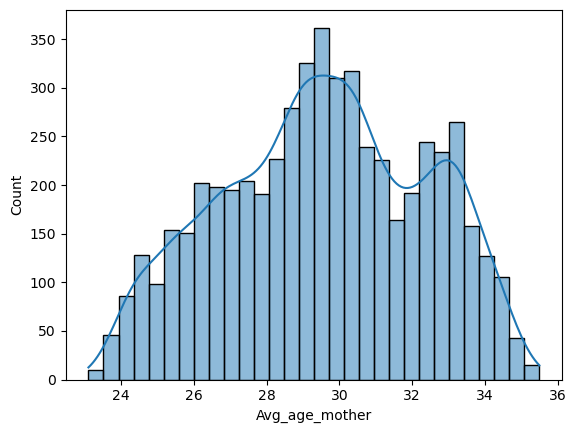

In [77]:
sns.histplot(us_births_country['Avg_age_mother'], bins=30, kde = True)

<Axes: xlabel='Avg_birth_weight(g)', ylabel='Count'>

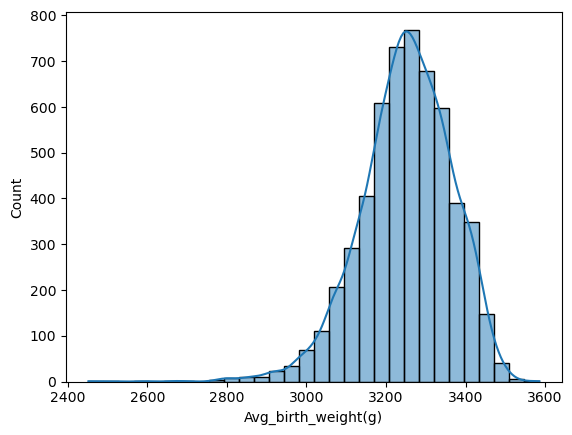

In [78]:
sns.histplot(us_births_country['Avg_birth_weight(g)'], bins=30, kde = True)

#### From histogram normal distribution for avg_age_mother and slightly left skewed distribution for avg_birth_weight.  It is a heavily right skewed distribution for births (which makes sense a few states have very larger populations), however I am not sure a choropleth map will make sense. 

## 4. Plotting a choropleth

In [96]:
# Create a data frame with states and Avg_age_mother

data_to_plot = us_births_country[['State','Avg_age_mother']]
data_to_plot.head()

,State,Avg_age_mother
0,Alabama,27.8
1,Alabama,24.1
2,Alabama,25.4
3,Alabama,26.7
4,Alabama,28.9


In [98]:
# Setup a folium map at a high-level zoom
map = folium.Map(location = [100, 0], zoom_start = 1.5)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = country_geo, 
    data = data_to_plot,
    columns = ['State', 'Avg_age_mother'],
    key_on = 'feature.properties.name', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "rating").add_to(map)
folium.LayerControl().add_to(map)

map

#### Montana, Nebraska and Vermont have the oldest avg_age_mother while South Dakota, Iowa, Wisconsin, Kentucky, New Mexico, Arkansa, Louisiana and Alabama have the young avg_age_mother. It would be interesting to see if these states have more mothers will lower level of education. It would also be interesting to filter on number of births in these states to see if states with older mothers have less kids and vice versa.

In [103]:
# Create a data frame with states and 'Avg_birth_weight(g)'

data_to_plot2 = us_births_country[['State','Avg_birth_weight(g)']]
data_to_plot2.head()

,State,Avg_birth_weight(g)
0,Alabama,3116.9
1,Alabama,3040.0
2,Alabama,3080.0
3,Alabama,3121.9
4,Alabama,3174.3


In [104]:
# Setup a folium map at a high-level zoom
map = folium.Map(location = [100, 0], zoom_start = 1.5)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = country_geo, 
    data = data_to_plot2,
    columns = ['State', 'Avg_birth_weight(g)'],
    key_on = 'feature.properties.name', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "rating").add_to(map)
folium.LayerControl().add_to(map)

map

#### Interestingly northern states tend to have babies with more weight vs the south. The states with the highest avg baby weights are Oregon, Idaho, Montana, South Dakota, Nebraska and New Hampshire. The states with the smallest avg baby weights are Arkansa, Mississippi and West Virgina. It would be interesting to add an addition layer to see if level of education in a state impacts birth weights. It would also be interesting to add an addition layer to see if age of mother impact birth weights.

## Saving the html map

In [106]:
map.save('plot_data.html')